In [1]:
import numpy as np
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import great_tables as tg
import altair as alt

In [2]:
df = pl.read_csv('../../DATA/cluster_mpg.csv')

In [4]:
df

mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
f64,i64,f64,f64,i64,f64,i64,str,str
18.0,8,307.0,130.0,3504,12.0,70,"""usa""","""chevrolet chevelle malibu"""
15.0,8,350.0,165.0,3693,11.5,70,"""usa""","""buick skylark 320"""
18.0,8,318.0,150.0,3436,11.0,70,"""usa""","""plymouth satellite"""
16.0,8,304.0,150.0,3433,12.0,70,"""usa""","""amc rebel sst"""
17.0,8,302.0,140.0,3449,10.5,70,"""usa""","""ford torino"""
…,…,…,…,…,…,…,…,…
27.0,4,140.0,86.0,2790,15.6,82,"""usa""","""ford mustang gl"""
44.0,4,97.0,52.0,2130,24.6,82,"""europe""","""vw pickup"""
32.0,4,135.0,84.0,2295,11.6,82,"""usa""","""dodge rampage"""


In [14]:
df.describe().transpose()

column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8
str,str,str,str,str,str,str,str,str
"""count""","""null_count""","""mean""","""std""","""min""","""25%""","""50%""","""75%""","""max"""
"""392.0""","""0.0""","""23.44591836734694""","""7.8050074865718""","""9.0""","""17.0""","""23.0""","""29.0""","""46.6"""
"""392.0""","""0.0""","""5.471938775510204""","""1.705783247452785""","""3.0""","""4.0""","""4.0""","""8.0""","""8.0"""
"""392.0""","""0.0""","""194.41198979591837""","""104.64400390890465""","""68.0""","""105.0""","""151.0""","""267.0""","""455.0"""
"""392.0""","""0.0""","""104.46938775510205""","""38.49115993282849""","""46.0""","""75.0""","""94.0""","""125.0""","""230.0"""
"""392.0""","""0.0""","""2977.5841836734694""","""849.4025600429492""","""1613.0""","""2226.0""","""2807.0""","""3613.0""","""5140.0"""
"""392.0""","""0.0""","""15.541326530612247""","""2.758864119188082""","""8.0""","""13.8""","""15.5""","""17.0""","""24.8"""
"""392.0""","""0.0""","""75.9795918367347""","""3.683736543577828""","""70.0""","""73.0""","""76.0""","""79.0""","""82.0"""
"""392""","""0""",null,null,"""europe""",null,null,null,"""usa"""


In [15]:
df['origin'].value_counts()

origin,count
str,u32
"""usa""",245
"""japan""",79
"""europe""",68


In [48]:
X = df.select(cs.exclude('name'))

In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [51]:
column_transformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['origin'])],
    remainder='passthrough'
)

In [52]:
X_encoded = column_transformer.fit_transform(X)

In [53]:
X_encoded

array([[0.000e+00, 0.000e+00, 1.000e+00, ..., 3.504e+03, 1.200e+01,
        7.000e+01],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 3.693e+03, 1.150e+01,
        7.000e+01],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 3.436e+03, 1.100e+01,
        7.000e+01],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.295e+03, 1.160e+01,
        8.200e+01],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.625e+03, 1.860e+01,
        8.200e+01],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.720e+03, 1.940e+01,
        8.200e+01]], shape=(392, 10))

In [54]:
feature_names = column_transformer.get_feature_names_out()

In [55]:
feature_names

array(['encoder__origin_europe', 'encoder__origin_japan',
       'encoder__origin_usa', 'remainder__mpg', 'remainder__cylinders',
       'remainder__displacement', 'remainder__horsepower',
       'remainder__weight', 'remainder__acceleration',
       'remainder__model_year'], dtype=object)

In [58]:
X_encoded = pl.DataFrame(X_encoded, schema=list(feature_names))

In [59]:
X

mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
f64,i64,f64,f64,i64,f64,i64,str
18.0,8,307.0,130.0,3504,12.0,70,"""usa"""
15.0,8,350.0,165.0,3693,11.5,70,"""usa"""
18.0,8,318.0,150.0,3436,11.0,70,"""usa"""
16.0,8,304.0,150.0,3433,12.0,70,"""usa"""
17.0,8,302.0,140.0,3449,10.5,70,"""usa"""
…,…,…,…,…,…,…,…
27.0,4,140.0,86.0,2790,15.6,82,"""usa"""
44.0,4,97.0,52.0,2130,24.6,82,"""europe"""
32.0,4,135.0,84.0,2295,11.6,82,"""usa"""


In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler()

In [62]:
scaled_data = scaler.fit_transform(X_encoded)

In [65]:
scaled_data = pl.DataFrame(scaled_data, schema=list(feature_names))

In [66]:
scaled_data

encoder__origin_europe,encoder__origin_japan,encoder__origin_usa,remainder__mpg,remainder__cylinders,remainder__displacement,remainder__horsepower,remainder__weight,remainder__acceleration,remainder__model_year
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,0.0,1.0,0.239362,1.0,0.617571,0.456522,0.53615,0.238095,0.0
0.0,0.0,1.0,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0
0.0,0.0,1.0,0.239362,1.0,0.645995,0.565217,0.51687,0.178571,0.0
0.0,0.0,1.0,0.18617,1.0,0.609819,0.565217,0.516019,0.238095,0.0
0.0,0.0,1.0,0.212766,1.0,0.604651,0.51087,0.520556,0.14881,0.0
…,…,…,…,…,…,…,…,…,…
0.0,0.0,1.0,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0
1.0,0.0,0.0,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0
0.0,0.0,1.0,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0


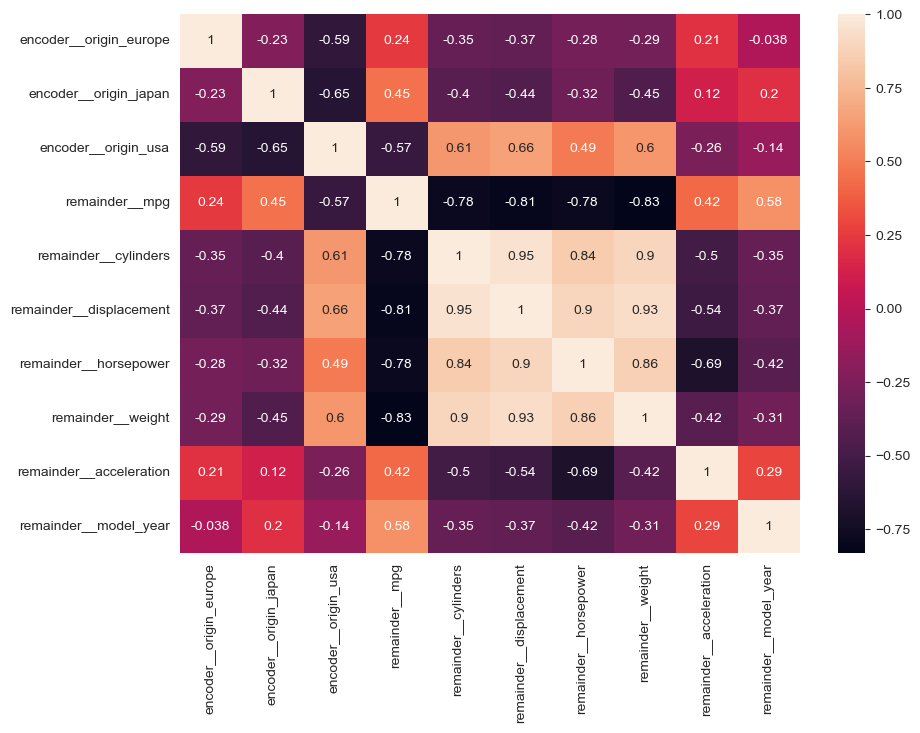

In [70]:
plt.figure(figsize=(10, 7))
sns.heatmap(scaled_data.corr(), annot=True, xticklabels=scaled_data.columns, yticklabels=scaled_data.columns)
plt.show()

<Figure size 1330x931 with 0 Axes>

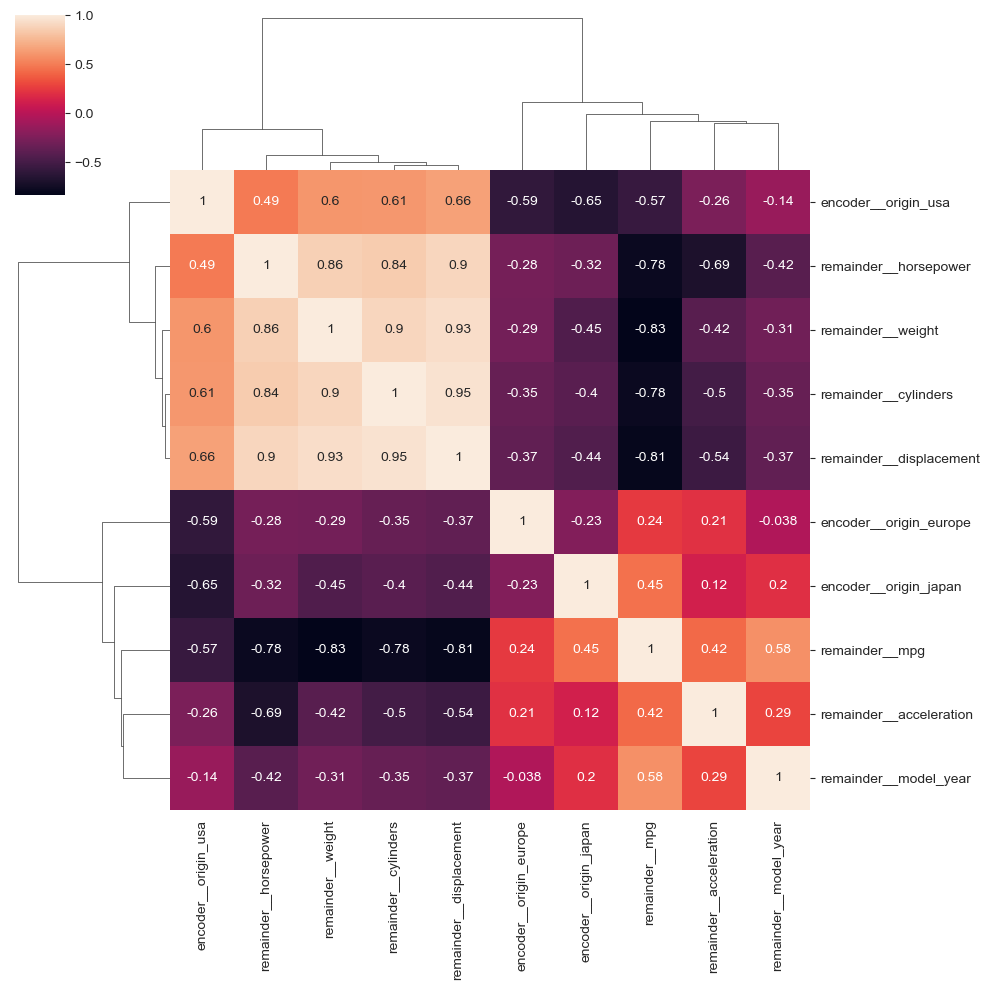

In [73]:
plt.figure(figsize=(10, 7), dpi=133)
sns.clustermap(scaled_data.corr(), annot=True, xticklabels=scaled_data.columns, yticklabels=scaled_data.columns)
plt.show()

<Figure size 1330x931 with 0 Axes>

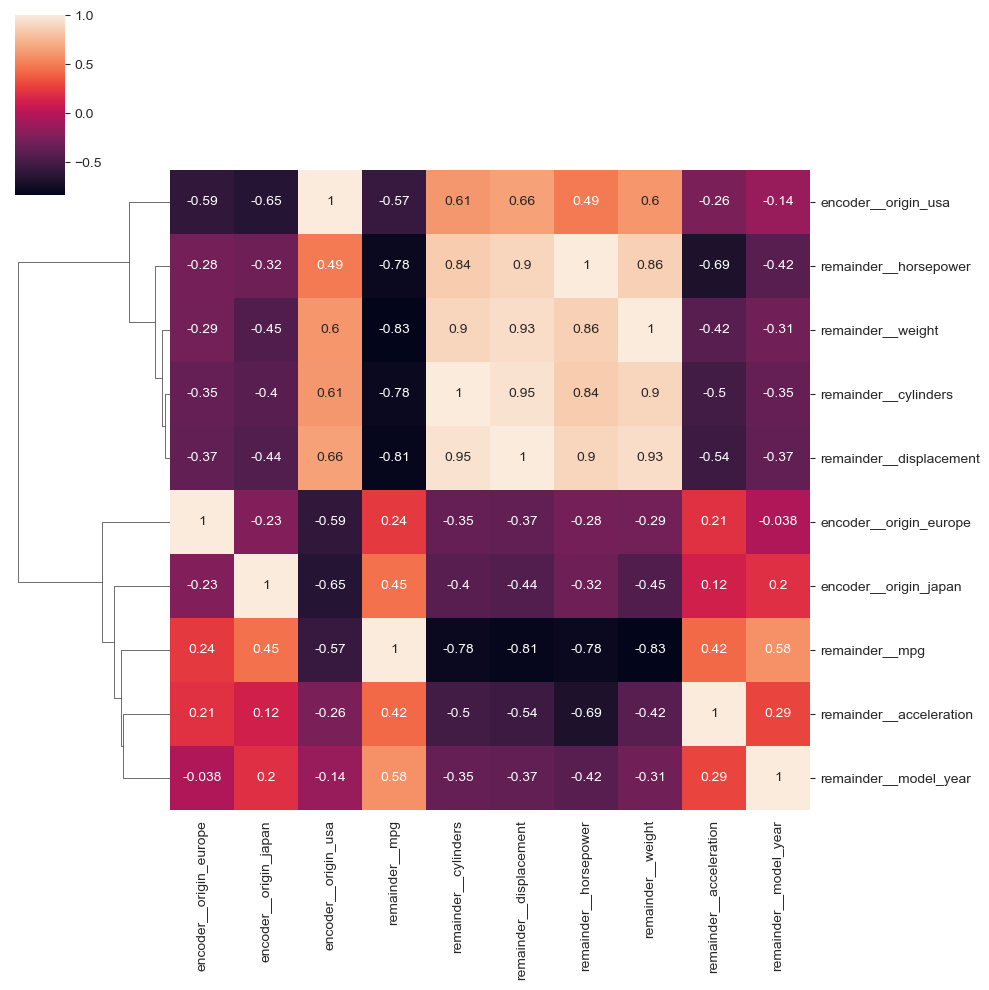

In [76]:
plt.figure(figsize=(10, 7), dpi=133)
sns.clustermap(
    scaled_data.corr(),
    annot=True,
    xticklabels=scaled_data.columns,
    yticklabels=scaled_data.columns,
    col_cluster=False)
plt.show()

In [78]:
from sklearn.cluster import AgglomerativeClustering

In [79]:
model = AgglomerativeClustering(n_clusters=None,distance_threshold=0)

In [80]:
cluster_labels = model.fit_predict(scaled_data)

In [81]:
cluster_labels

array([247, 252, 360, 302, 326, 381, 384, 338, 300, 279, 217, 311, 377,
       281, 232, 334, 272, 375, 354, 333, 317, 345, 329, 289, 305, 383,
       290, 205, 355, 269, 202, 144, 245, 297, 386, 358, 199, 337, 330,
       339, 293, 352, 283, 196, 253, 168, 378, 331, 201, 268, 256, 361,
       250, 197, 246, 371, 324, 230, 203, 261, 380, 376, 308, 389, 332,
       306, 236, 391, 350, 274, 288, 313, 231, 298, 100, 295, 210, 248,
       187, 390, 373, 266, 307, 379, 212, 357, 191, 314, 208, 249, 343,
       294, 374, 322, 323, 362, 188, 296, 369, 286, 251, 229, 244, 285,
       349, 365, 259, 213, 276, 215, 222, 204, 359, 287, 166, 387, 291,
       220, 216, 260, 129, 367, 340, 346, 301, 342, 228, 388, 370, 218,
       255, 327, 347, 278, 271, 258, 282, 318, 273, 123, 172, 382, 363,
       356, 195, 280, 239, 364, 267, 351, 186, 257, 277, 299, 127, 366,
       234, 385, 192, 372, 292, 233, 270, 263, 133, 165, 161, 198,  97,
       315, 134, 207, 147, 175, 262, 348,  98, 214,  48, 353, 17

In [82]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [83]:
linkage_matrix = hierarchy.linkage(model.children_)

In [84]:
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]],
      shape=(390, 4))

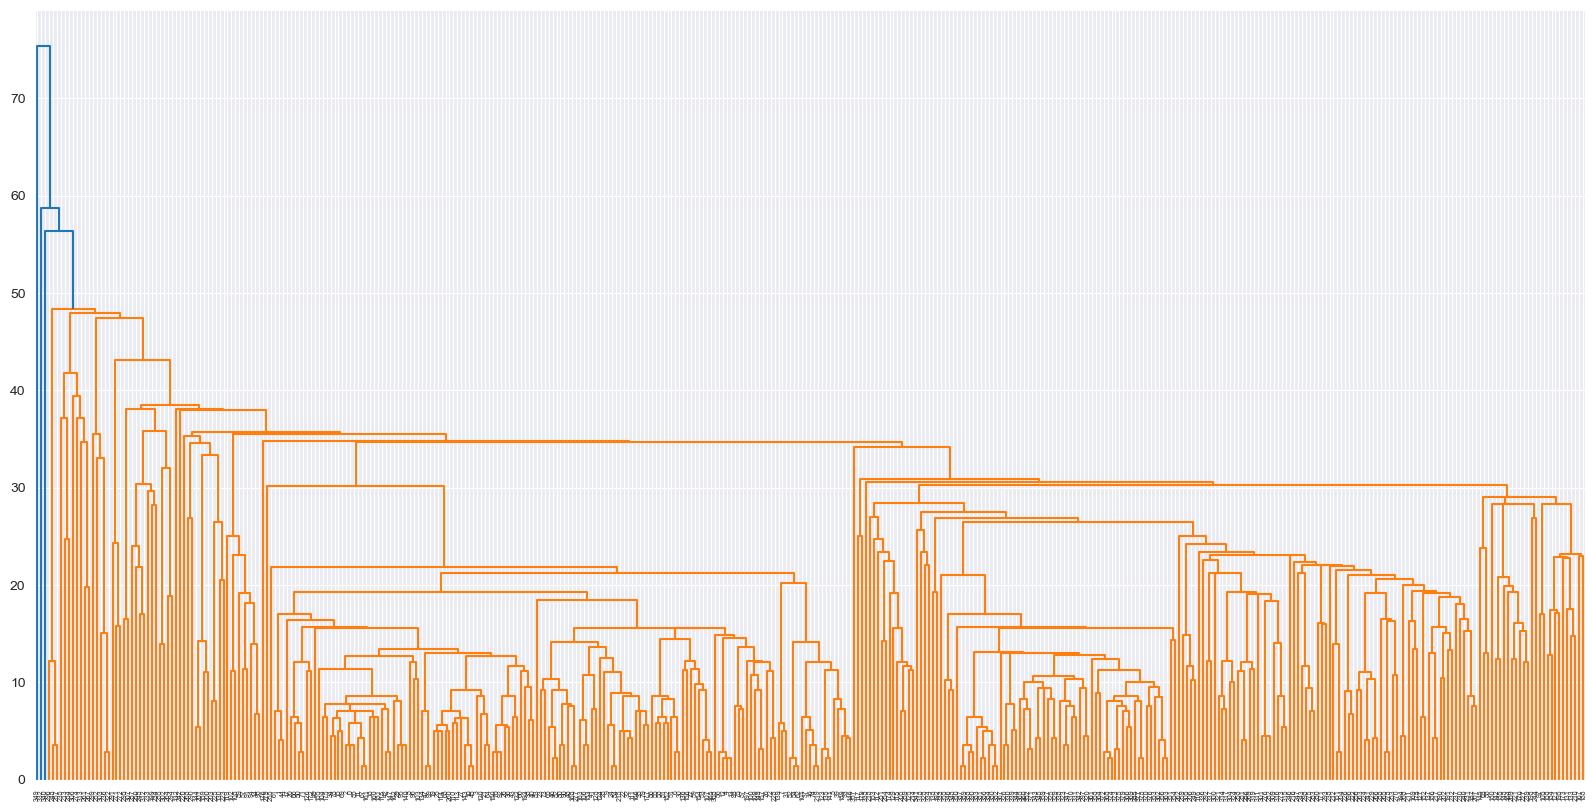

In [85]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix)

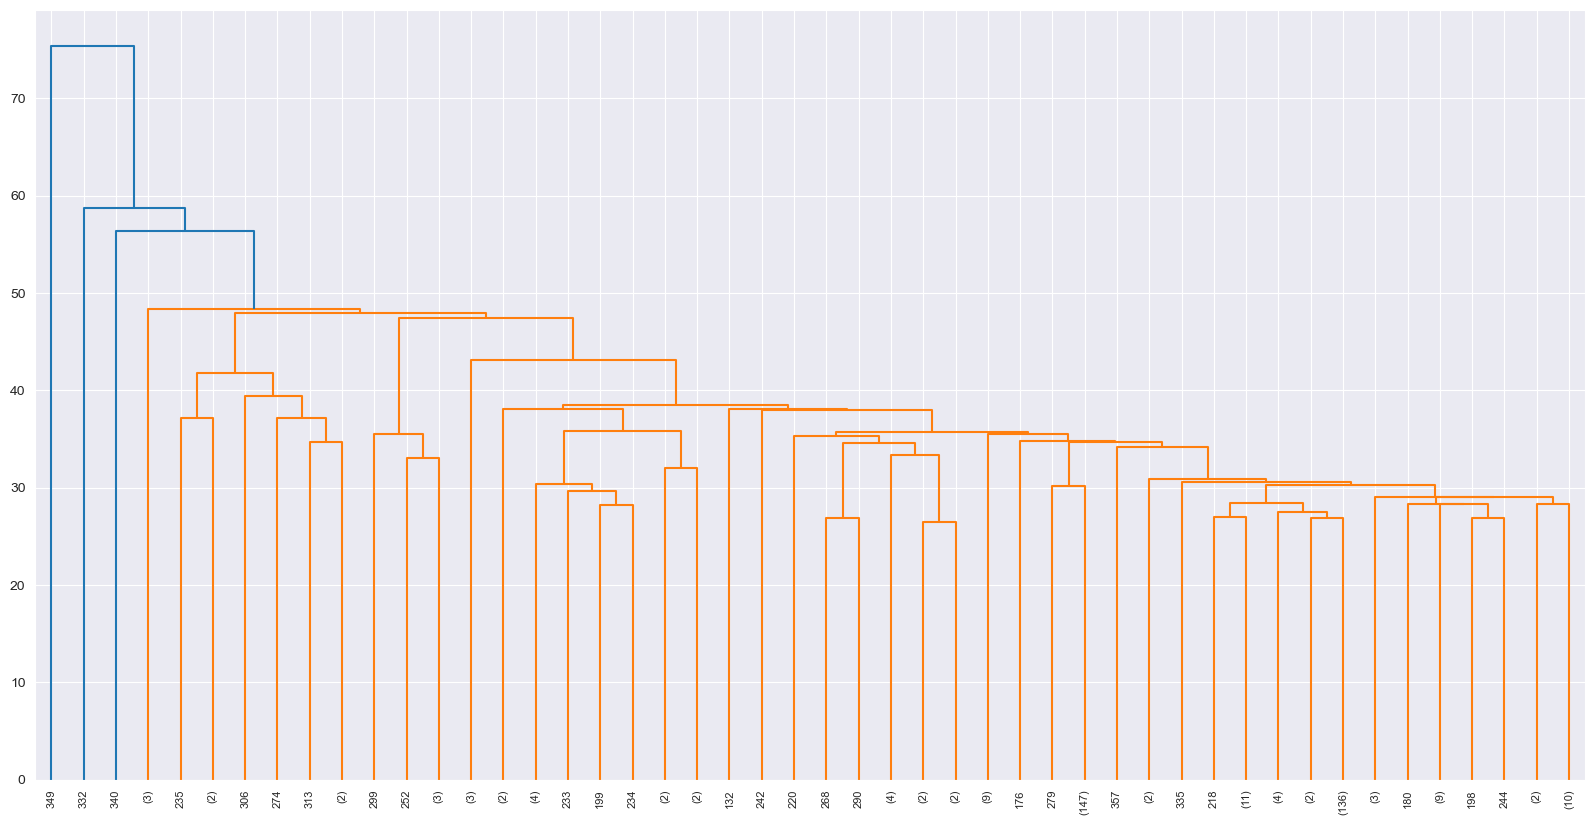

In [86]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp',p=48)

NameError: name 'scaled_df' is not defined